### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [2]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

2024-01-08 11:37:14.611610: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# from google.colab import drive
# drive.mount('/content/gdrive')

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [4]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path('./skin_cancer_ISIC_dataset/Train/')
data_dir_test = pathlib.Path('./skin_cancer_ISIC_dataset/Test/')

In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [6]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [7]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [60]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_test,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 118 files belonging to 9 classes.


In [9]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [10]:
print(type(train_ds))

<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>


In [11]:
for images, labels in train_ds.take(1):
  print(len(images))
  print(len(labels))

32
32


32
32


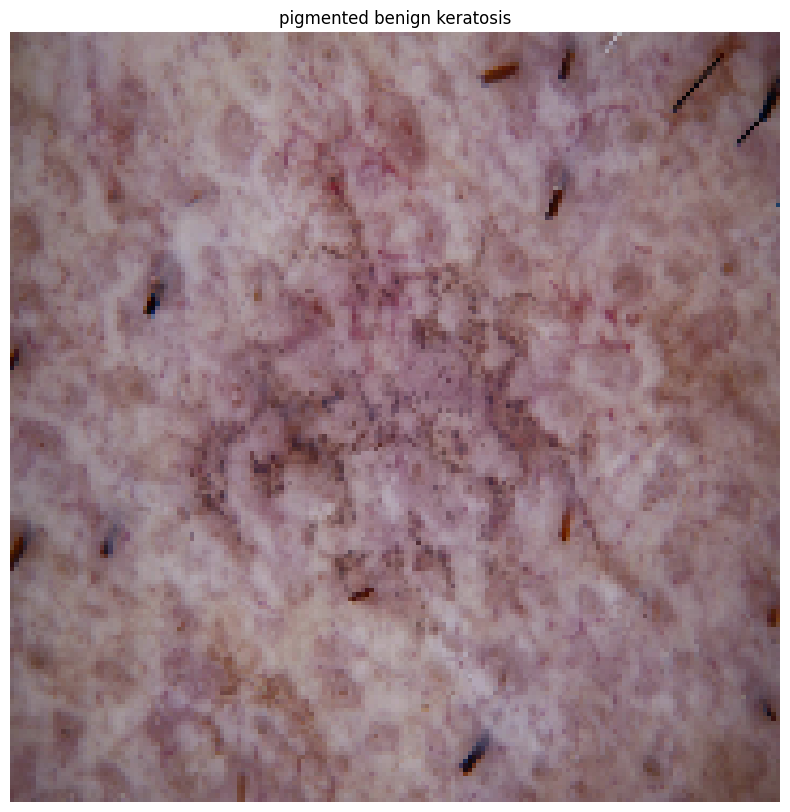

In [12]:

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  print(len(images))
  print(len(labels))
  plt.imshow(images[10].numpy().astype("uint8"))
  plt.title(class_names[labels[10]])
  plt.axis("off")


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

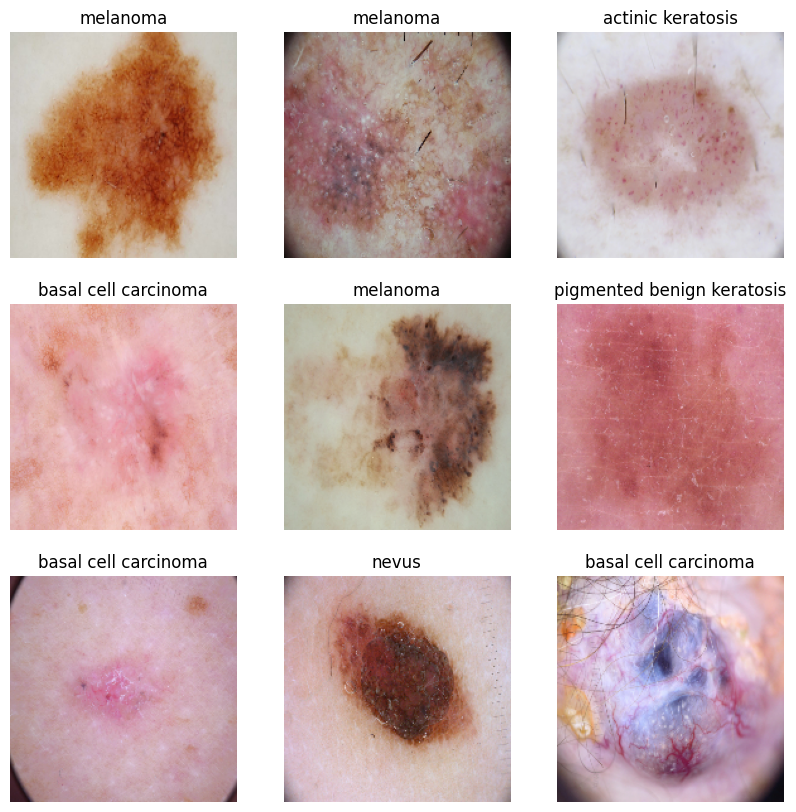

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(5):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

### your code goes here, you can use training or validation data to visualize

In [14]:
#print(type(train_ds))
#print(len(train_ds)


The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [15]:
#overlaps data preprocessing and model execution while training., Speed up training
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [16]:
### Your code goes here
num_classes = 9

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

  layers.Conv2D(16, 3, padding='same', activation='relu'),

  layers.MaxPooling2D(),

  layers.Conv2D(32, 3, padding='same', activation='relu'),

  layers.MaxPooling2D(),

  layers.Conv2D(64, 3, padding='same', activation='relu'),

  layers.MaxPooling2D(),

  layers.Flatten(),

  layers.Dense(128, activation='relu'),

  layers.Dense(num_classes)
  #Dense Layer - A dense layer represents a matrix vector multiplication.  each input node is connected to each output node.
])



### Compile the model
Choose an appropirate optimiser and loss function for model training

In [17]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [18]:
### Todo, choose an appropirate optimiser and loss function
#RMSprop. RMSprop is a very effective, but currently unpublished adaptive learning rate method
#Adam. Adam is a recently proposed update that looks a bit like RMSProp with momentum. The (simplified) update looks as follows:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


56/56 [==============================] - 31s 441ms/step - loss: 2.0584 - accuracy: 0.2533 - val_loss: 2.2998 - val_accuracy: 0.2288
Epoch 2/20
56/56 [==============================] - 18s 329ms/step - loss: 1.7935 - accuracy: 0.3488 - val_loss: 2.2639 - val_accuracy: 0.2458
Epoch 3/20
56/56 [==============================] - 17s 307ms/step - loss: 1.6131 - accuracy: 0.4436 - val_loss: 2.1556 - val_accuracy: 0.3220
Epoch 4/20
56/56 [==============================] - 18s 318ms/step - loss: 1.4030 - accuracy: 0.5056 - val_loss: 2.4674 - val_accuracy: 0.2966
Epoch 5/20
56/56 [==============================] - 19s 339ms/step - loss: 1.3433 - accuracy: 0.5195 - val_loss: 2.1001 - val_accuracy: 0.3898
Epoch 6/20
56/56 [==============================] - 20s 356ms/step - loss: 1.2385 - accuracy: 0.5530 - val_loss: 2.3639 - val_accuracy: 0.4068
Epoch 7/20
56/56 [==============================] - 19s 336ms/step - loss: 1.1749 - accuracy: 0.5742 - val_loss: 2.7015 - val_accuracy: 0.2966
Epoch 8/20

### Train the model

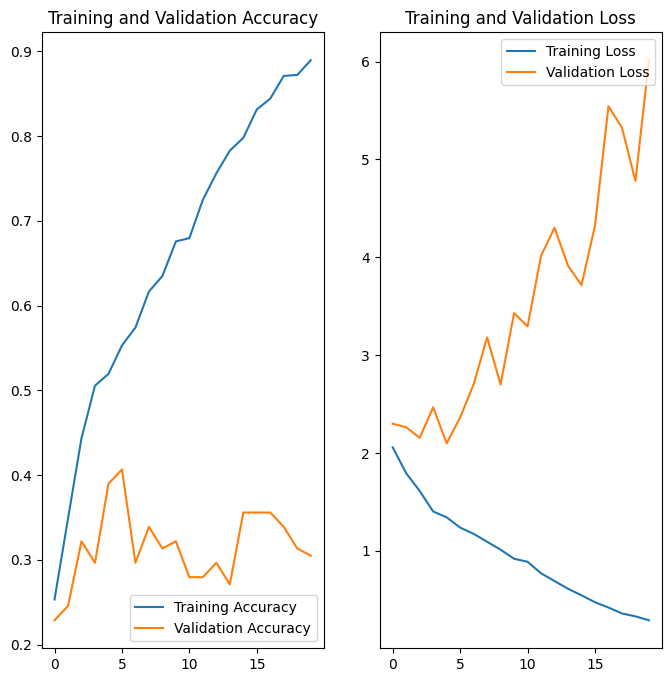

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [21]:
### Your code goes here
num_classes = 9

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  
  layers.MaxPooling2D(),

  layers.Flatten(),
  
  layers.Dense(128, activation='relu'),
 
  layers.Dense(num_classes)
  
])


### Visualizing training results

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

#### Finding on the first base model

- The model is overfitting because we can also see difference in loss functions in training & test around the 8-10th epoch

- The accuracy is just around 80-85% because there are enough features to remember the pattern.

- But again, it's too early to comment on the overfitting & underfitting debate

### Write your findings here

In [22]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(img_height,
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
    layers.experimental.preprocessing.RandomTranslation(1,.5,fill_mode="reflect",interpolation="bilinear",seed=None,fill_value=0.0),
    layers.experimental.preprocessing.RandomCrop(img_height,img_width),
  ]
)

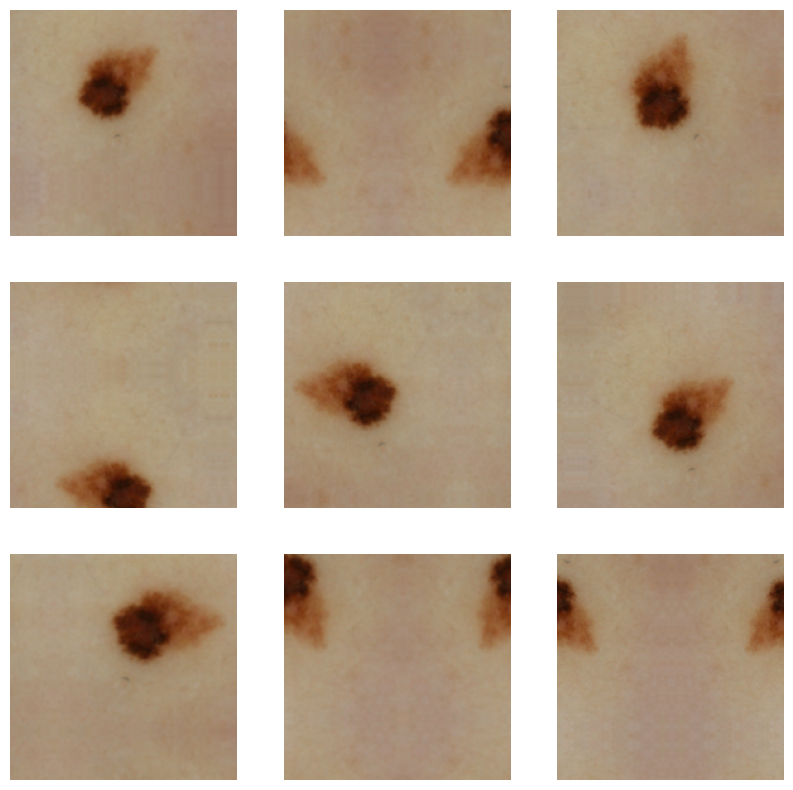

In [23]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [24]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])



### Compiling the model

In [25]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [26]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 133s 2s/step - loss: 2.1742 - accuracy: 0.1981 - val_loss: 2.4181 - val_accuracy: 0.1864
Epoch 2/20
56/56 [==============================] - 165s 3s/step - loss: 1.9931 - accuracy: 0.2573 - val_loss: 2.3023 - val_accuracy: 0.1864
Epoch 3/20
56/56 [==============================] - 166s 3s/step - loss: 1.8429 - accuracy: 0.3080 - val_loss: 2.1402 - val_accuracy: 0.1864
Epoch 4/20
56/56 [==============================] - 183s 3s/step - loss: 1.6997 - accuracy: 0.3560 - val_loss: 2.6091 - val_accuracy: 0.1780
Epoch 5/20
56/56 [==============================] - 156s 3s/step - loss: 1.7321 - accuracy: 0.3493 - val_loss: 2.1199 - val_accuracy: 0.1949
Epoch 6/20
56/56 [==============================] - 124s 2s/step - loss: 1.6538 - accuracy: 0.3756 - val_loss: 2.1030 - val_accuracy: 0.2203
Epoch 7/20
56/56 [==============================] - 131s 2s/step - loss: 1.6601 - accuracy: 0.3711 - val_loss: 2.2229 - val_accuracy: 0.1864
Epoch 8/20
56

### Visualizing the results

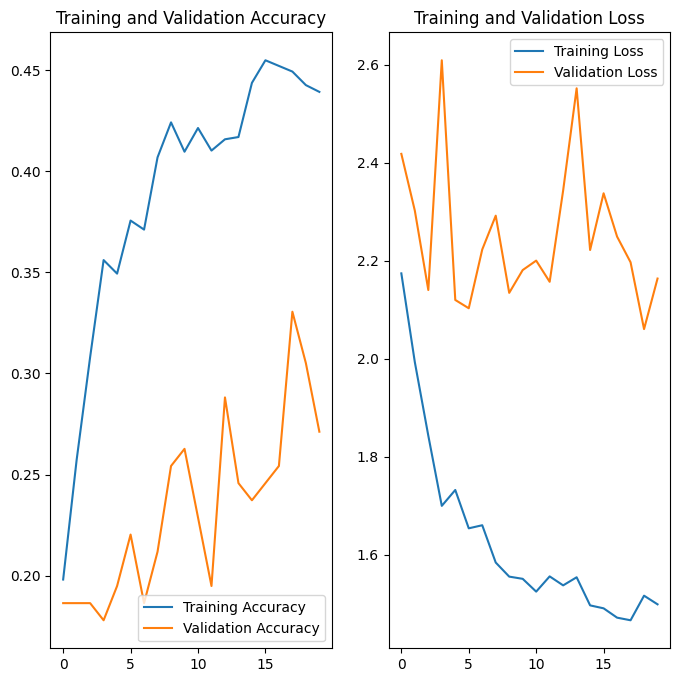

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [28]:
# For convenience, let us set up the path for the training and validation sets
train_dir = os.path.join('./skin_cancer_ISIC_dataset/Train/')
val_dir = os.path.join('./skin_cancer_ISIC_dataset/Test/')

In [29]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Setting batch size and image size
batch_size = 100
IMG_SHAPE = 224

image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )

train_data_gen = image_gen_train.flow_from_directory(
                                                batch_size=batch_size,
                                                directory=train_dir,
                                                shuffle=True,
                                                target_size=(IMG_SHAPE,IMG_SHAPE),
                                                class_mode='sparse'
                                                )

# Create validation images generator
image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=val_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='sparse')

Found 2239 images belonging to 9 classes.
Found 118 images belonging to 9 classes.


In [30]:
#Create a CNN model
#Experiment #1
#A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor
import numpy as np
import glob
import shutil
import matplotlib.pyplot as plt

# Import layers explicitly to keep our code compact
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D


model = Sequential()

model.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_SHAPE,IMG_SHAPE, 3)))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, 3, padding='same', activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))

model.add(Dropout(0.2))

model.add(Dense(9))

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
epochs = 20

history = model.fit(
  train_data_gen,
  validation_data=val_data_gen,
  epochs=10
)


Epoch 1/10
23/23 [==============================] - 84s 4s/step - loss: 2.8851 - accuracy: 0.2322 - val_loss: 2.3773 - val_accuracy: 0.1695
Epoch 2/10
23/23 [==============================] - 81s 4s/step - loss: 1.7531 - accuracy: 0.3653 - val_loss: 2.3739 - val_accuracy: 0.2458
Epoch 3/10
23/23 [==============================] - 78s 3s/step - loss: 1.6199 - accuracy: 0.4297 - val_loss: 2.1143 - val_accuracy: 0.2966
Epoch 4/10
23/23 [==============================] - 82s 4s/step - loss: 1.5871 - accuracy: 0.4466 - val_loss: 2.1201 - val_accuracy: 0.3390
Epoch 5/10
23/23 [==============================] - 82s 4s/step - loss: 1.4464 - accuracy: 0.4944 - val_loss: 2.0567 - val_accuracy: 0.3814
Epoch 6/10
23/23 [==============================] - 77s 3s/step - loss: 1.4575 - accuracy: 0.4850 - val_loss: 2.0179 - val_accuracy: 0.3729
Epoch 7/10
23/23 [==============================] - 69s 3s/step - loss: 1.4234 - accuracy: 0.4962 - val_loss: 2.2731 - val_accuracy: 0.3051
Epoch 8/10
23/23 [==

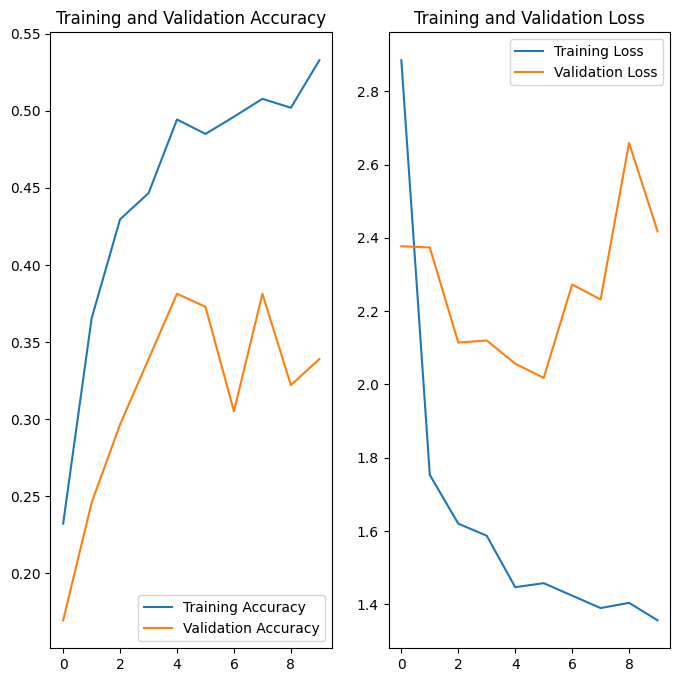

In [31]:
import matplotlib.pyplot as plt
epochs=10
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)



plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

#### Finding from Second Model

There is no improvement in accuracy but we can definitely see the overfitting problem has solved due to data augmentation

We can increase the epochs to increase the accuracy so it's too early for judgement

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [32]:
## Your code goes here.
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
len(path_list)

2239

In [33]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,skin_cancer_ISIC_dataset/Train/melanoma/ISIC_0...,melanoma
1,skin_cancer_ISIC_dataset/Train/melanoma/ISIC_0...,melanoma
2,skin_cancer_ISIC_dataset/Train/melanoma/ISIC_0...,melanoma
3,skin_cancer_ISIC_dataset/Train/melanoma/ISIC_0...,melanoma
4,skin_cancer_ISIC_dataset/Train/melanoma/ISIC_0...,melanoma
...,...,...
2234,skin_cancer_ISIC_dataset/Train/dermatofibroma/...,dermatofibroma
2235,skin_cancer_ISIC_dataset/Train/dermatofibroma/...,dermatofibroma
2236,skin_cancer_ISIC_dataset/Train/dermatofibroma/...,dermatofibroma
2237,skin_cancer_ISIC_dataset/Train/dermatofibroma/...,dermatofibroma


Class=3, n=438 (19.562%)
Class=5, n=462 (20.634%)
Class=4, n=357 (15.945%)
Class=1, n=376 (16.793%)
Class=0, n=114 (5.092%)
Class=7, n=181 (8.084%)
Class=8, n=139 (6.208%)
Class=6, n=77 (3.439%)
Class=2, n=95 (4.243%)


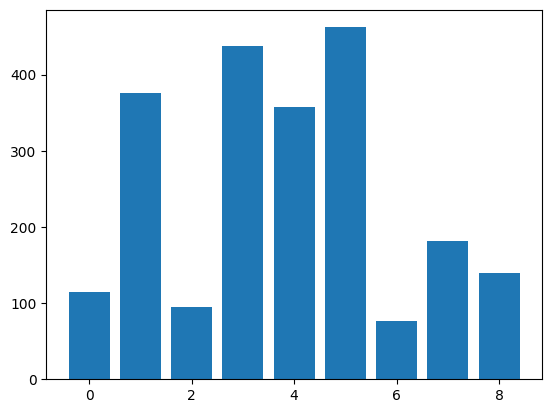

In [34]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter
# split into input and output elements
X, y = original_df['Path'], original_df['Label']
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


**Answer-1** :- squamous cell carcinoma has least number of samples

**Answer-2**:- actinic keratosis and dermatofibroma have proportionate number of classes.
melanoma and pigmented benign keratosis have proprtionate number of classes

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [35]:
!pip install Augmentor


[notice] A new release of pip is available: 23.2 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [36]:
path_to_training_dataset="./skin_cancer_ISIC_dataset/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to ./skin_cancer_ISIC_dataset/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1475E3190>: 100%|██████████| 500/500 [00:03<00:00, 154.06 Samples/s]


Initialised with 376 image(s) found.
Output directory set to ./skin_cancer_ISIC_dataset/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x149B56C10>: 100%|██████████| 500/500 [00:03<00:00, 166.63 Samples/s]                  


Initialised with 95 image(s) found.
Output directory set to ./skin_cancer_ISIC_dataset/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1479F74D0>: 100%|██████████| 500/500 [00:03<00:00, 151.93 Samples/s]                  


Initialised with 438 image(s) found.
Output directory set to ./skin_cancer_ISIC_dataset/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1475A9650>: 100%|██████████| 500/500 [00:19<00:00, 25.64 Samples/s]                   


Initialised with 357 image(s) found.
Output directory set to ./skin_cancer_ISIC_dataset/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=2592x1944 at 0x147542590>: 100%|██████████| 500/500 [00:19<00:00, 25.40 Samples/s]                  


Initialised with 462 image(s) found.
Output directory set to ./skin_cancer_ISIC_dataset/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x147947610>: 100%|██████████| 500/500 [00:03<00:00, 150.58 Samples/s]                  


Initialised with 77 image(s) found.
Output directory set to ./skin_cancer_ISIC_dataset/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x147D80C10>: 100%|██████████| 500/500 [00:08<00:00, 60.08 Samples/s]                  


Initialised with 181 image(s) found.
Output directory set to ./skin_cancer_ISIC_dataset/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x149B2FE10>: 100%|██████████| 500/500 [00:03<00:00, 135.08 Samples/s]


Initialised with 139 image(s) found.
Output directory set to ./skin_cancer_ISIC_dataset/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1497D8C90>: 100%|██████████| 500/500 [00:03<00:00, 140.08 Samples/s]                  


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [37]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [38]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['skin_cancer_ISIC_dataset/Train/melanoma/output/melanoma_original_ISIC_0011094.jpg_ba297a88-543b-4a88-a463-c96580927ff8.jpg',
 'skin_cancer_ISIC_dataset/Train/melanoma/output/melanoma_original_ISIC_0010329.jpg_06f95569-5389-46c2-8c8f-59f08e3f68b3.jpg',
 'skin_cancer_ISIC_dataset/Train/melanoma/output/melanoma_original_ISIC_0010007.jpg_6b2a3b1a-432e-4ce6-9ddd-7c615c424099.jpg',
 'skin_cancer_ISIC_dataset/Train/melanoma/output/melanoma_original_ISIC_0010241.jpg_d82d1053-0a6c-4fe4-bef2-51968742c4c0.jpg',
 'skin_cancer_ISIC_dataset/Train/melanoma/output/melanoma_original_ISIC_0000394.jpg_ca82155c-5ecb-43a7-9d04-3be842eb776f.jpg',
 'skin_cancer_ISIC_dataset/Train/melanoma/output/melanoma_original_ISIC_0009910.jpg_85941f70-a77a-43e4-9efc-bd86eda36578.jpg',
 'skin_cancer_ISIC_dataset/Train/melanoma/output/melanoma_original_ISIC_0001152.jpg_e2535516-3d0f-4afd-be50-4ac2b4e726bf.jpg',
 'skin_cancer_ISIC_dataset/Train/melanoma/output/melanoma_original_ISIC_0010750.jpg_b51ed6bd-5142-4512-8e59-9e4

In [39]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',

In [40]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [41]:
new_df = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])

In [42]:
new_df['Label'].value_counts()

Label
melanoma                      500
pigmented benign keratosis    500
nevus                         500
basal cell carcinoma          500
actinic keratosis             500
squamous cell carcinoma       500
vascular lesion               500
seborrheic keratosis          500
dermatofibroma                500
Name: count, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [43]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [44]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training', ## Todo choose the correct parameter value, so that only training data is refered to
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [45]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_test,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [49]:
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [50]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [51]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 73s 421ms/step - loss: 1.5993 - accuracy: 0.4273 - val_loss: 2.1009 - val_accuracy: 0.2101
Epoch 2/20
169/169 [==============================] - 68s 400ms/step - loss: 1.0537 - accuracy: 0.6263 - val_loss: 1.3937 - val_accuracy: 0.6058
Epoch 3/20
169/169 [==============================] - 68s 401ms/step - loss: 0.6918 - accuracy: 0.7578 - val_loss: 1.1123 - val_accuracy: 0.5924
Epoch 4/20
169/169 [==============================] - 71s 414ms/step - loss: 0.4942 - accuracy: 0.8348 - val_loss: 1.0824 - val_accuracy: 0.6526
Epoch 5/20
169/169 [==============================] - 67s 394ms/step - loss: 0.3374 - accuracy: 0.8780 - val_loss: 1.0726 - val_accuracy: 0.6347
Epoch 6/20
169/169 [==============================] - 68s 402ms/step - loss: 0.2811 - accuracy: 0.8973 - val_loss: 1.3091 - val_accuracy: 0.6177
Epoch 7/20
169/169 [==============================] - 69s 403ms/step - loss: 0.2146 - accuracy: 0.9249 - val_loss: 0.9815 - val_ac

In [53]:
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [56]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [57]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 78s 449ms/step - loss: 1.9977 - accuracy: 0.2396 - val_loss: 1.6131 - val_accuracy: 0.3779
Epoch 2/20
169/169 [==============================] - 75s 443ms/step - loss: 1.4518 - accuracy: 0.4540 - val_loss: 1.4014 - val_accuracy: 0.4491
Epoch 3/20
169/169 [==============================] - 68s 397ms/step - loss: 1.2560 - accuracy: 0.5297 - val_loss: 1.2097 - val_accuracy: 0.5301
Epoch 4/20
169/169 [==============================] - 69s 403ms/step - loss: 1.0559 - accuracy: 0.6053 - val_loss: 1.0839 - val_accuracy: 0.6162
Epoch 5/20
169/169 [==============================] - 71s 413ms/step - loss: 0.8857 - accuracy: 0.6806 - val_loss: 0.9938 - val_accuracy: 0.6526
Epoch 6/20
169/169 [==============================] - 72s 421ms/step - loss: 0.7406 - accuracy: 0.7339 - val_loss: 0.9196 - val_accuracy: 0.6927
Epoch 7/20
169/169 [==============================] - 89s 523ms/step - loss: 0.5859 - accuracy: 0.7904 - val_loss: 0.8107 - val_ac

#### **Todo:**  Visualize the model results

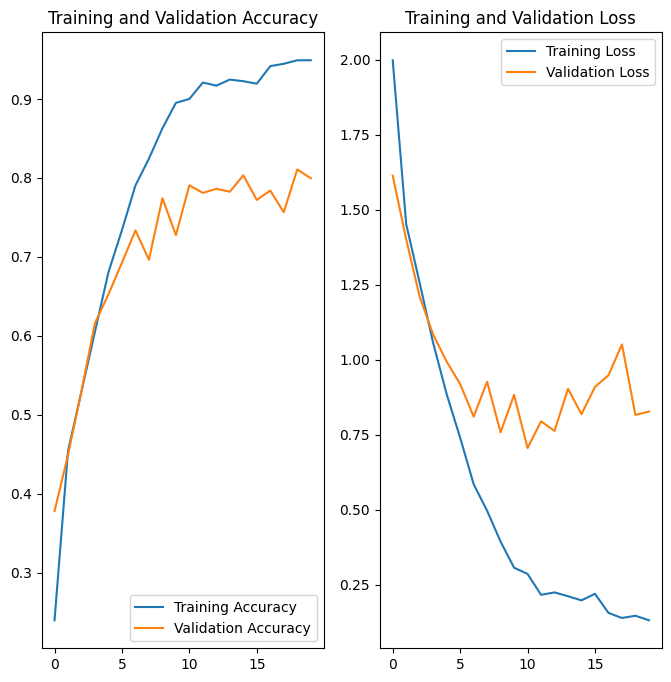

In [58]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



- Accuracy on training data has increased by using Augmentor library

- Model is still overfitting

- The problem of overfitting can be solved by add more layer,neurons or adding dropout layers.

- The Model can be further improved by tuning the hyperparameter

In [61]:
accuracy = model.evaluate(val_ds)
print(f'Test accuracy: {round(accuracy[1], 2)}')

4/4 [==============================] - 3s 74ms/step - loss: 7.6980 - accuracy: 0.3390
Test accuracy: 0.34
